In [6]:
#Import packages:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



#Define functions:
def sim_r_squared_k(n, k, reps):
    x = np.ones((n, k+1))
    y = np.zeros(n)
    result = []

    for _ in range(reps):
        x[:, 1:k+1] = np.random.randn(n, k)
        np.sum(x, axis=1, out=y)
        y += np.random.randn(n)
        model = sm.OLS(y, x).fit()
        result.append(model.rsquared)

    return result



def run(k, reps=10000, maxn=200):
    sizes = np.arange(10, maxn+1, 10)
    r_squared_q95 = []
    r_squared_q5 = []
    r_squared_mean = []

    for s in sizes:
        print(s)
        result = sim_r_squared_k(s, k, reps)
        r_squared_mean.append(np.mean(result))
        r_squared_q5.append(np.quantile(result, 0.05))
        r_squared_q95.append(np.quantile(result, 0.95))

    plt.scatter(sizes, r_squared_mean)
    plt.plot(sizes, r_squared_q5, color='black')
    plt.plot(sizes, r_squared_q95, color='black')
    plt.xlabel("sample size")
    plt.ylabel("R²")
    plt.legend([])
    plt.show()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


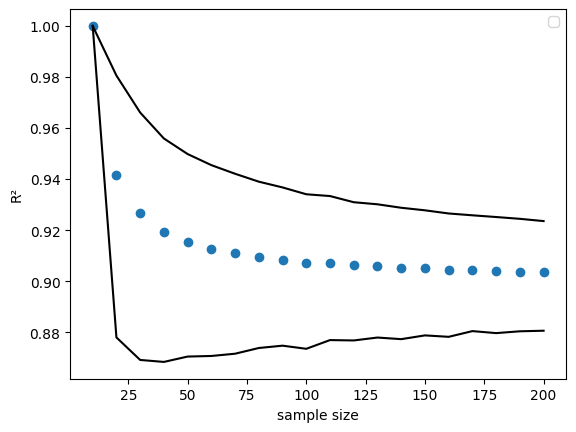

In [7]:
#First graph 
run(9)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


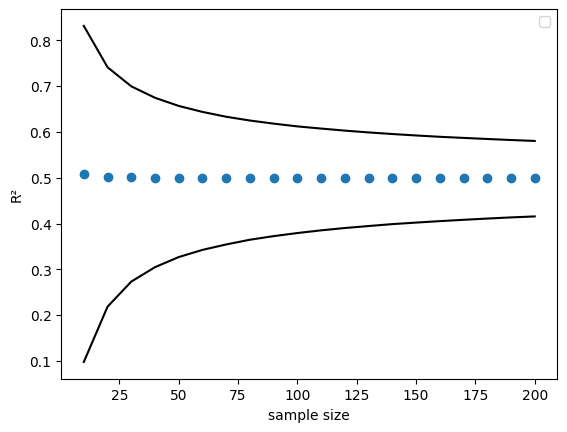

In [8]:
#Second graph
run(1,1000000)